# Fetch data from Kaggle

---

You first need to download to your machine a **JSON file (authentication token)** from Kaggle for authentication.


The process is as follows:
  1. From the site header, click on your user profile picture, then on **“Account”** from the dropdown menu. This will take you to your account settings.

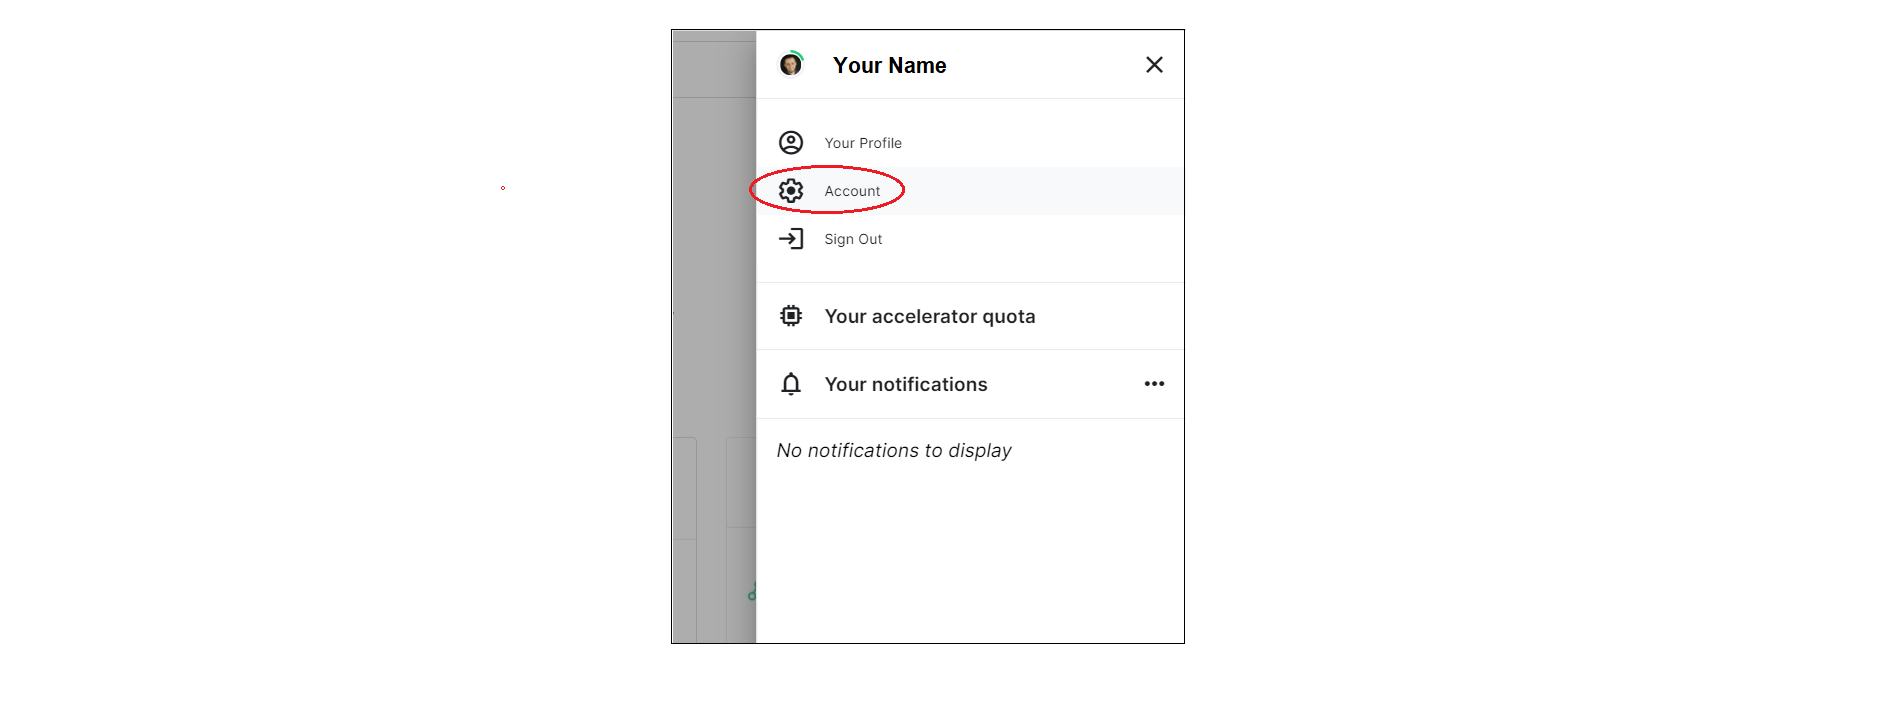

2. Scroll down to the section of the page called **API**.


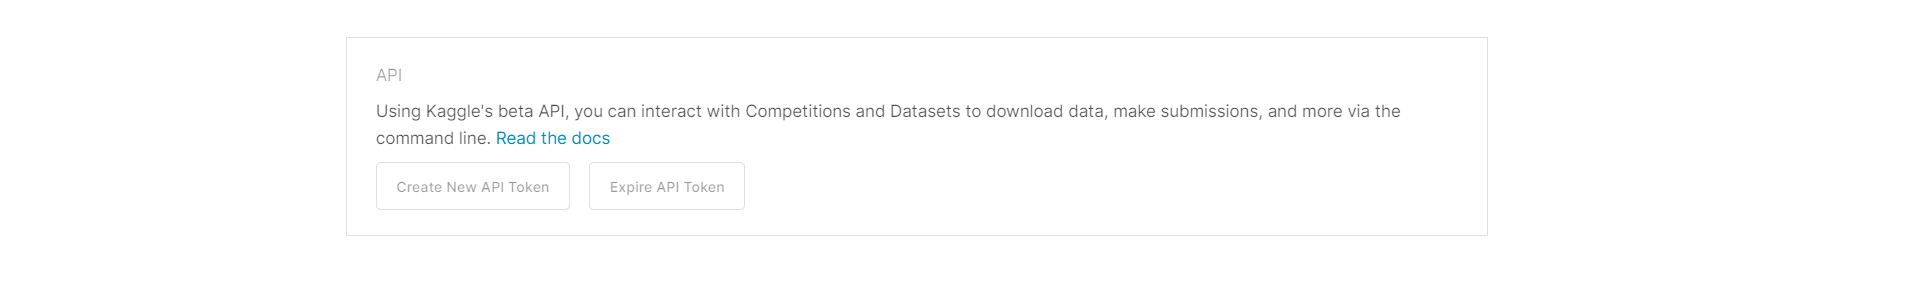

3. Click **Expire API Token** to remove previous tokens.
4. To create a new token, click on the “**Create New API Token**” button. It will generate a fresh authentication token and will download a **kaggle.json file** onto your machine.

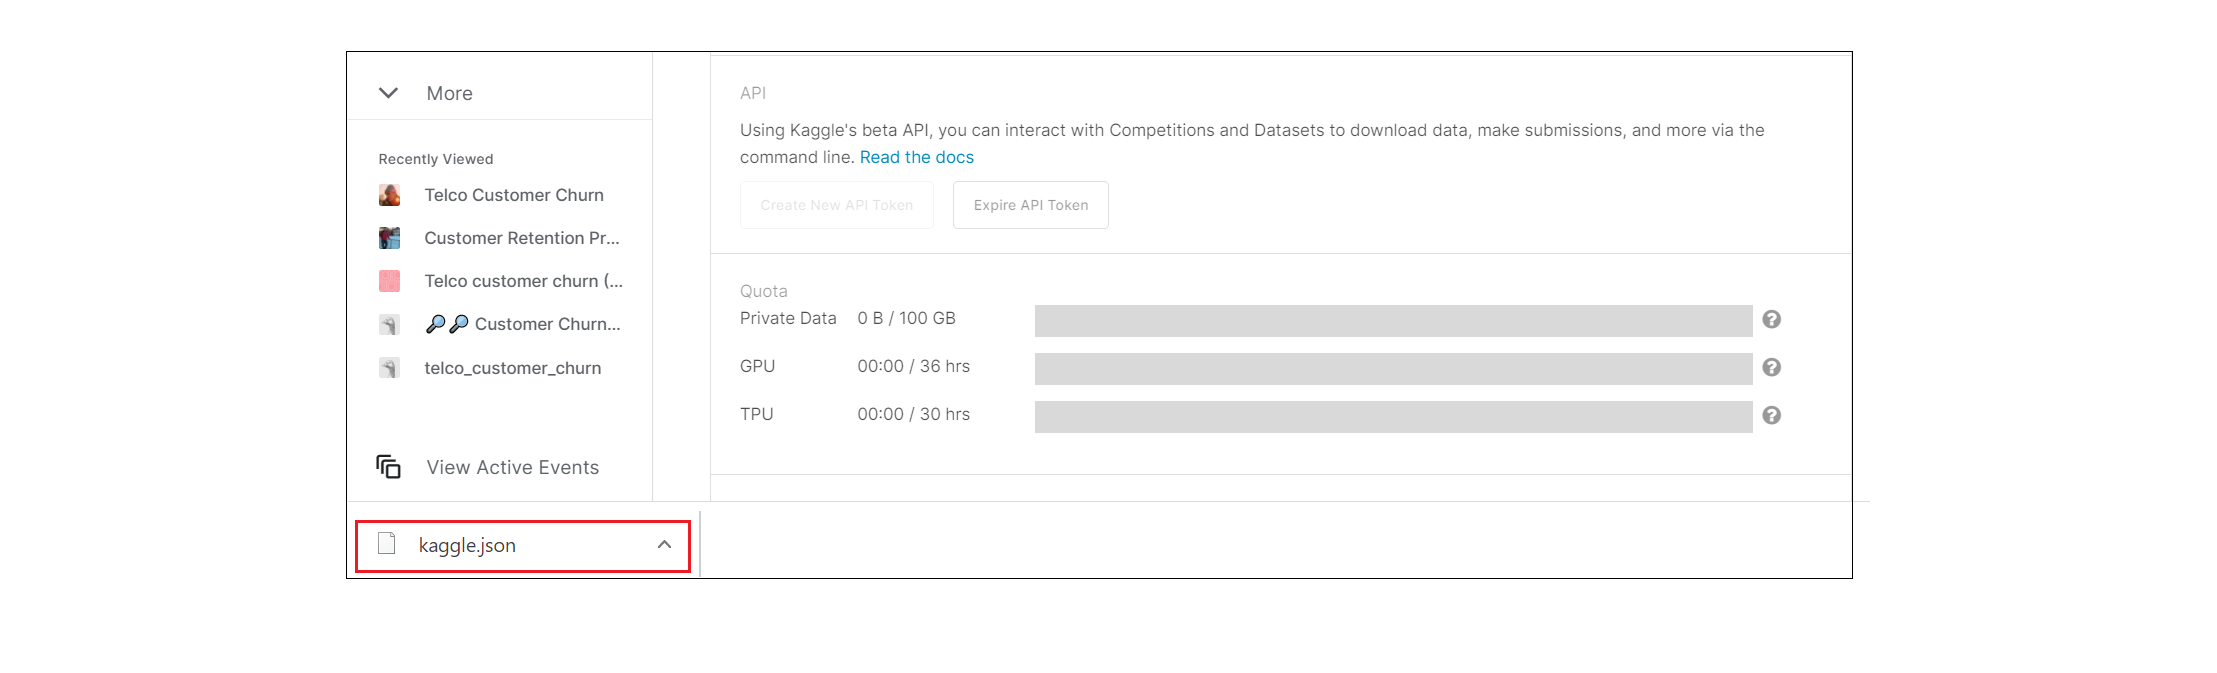

In case of any difficulty, go to the "Authentication" section at this [link](https://www.kaggle.com/docs/api).



* This file should now be saved locally on your machine. **Please make sure this file is named kaggle.json**


---

# **Data Collection**

## Objectives

* Fetch data from Kaggle and prepare it for further processes.

## Inputs

*   Kaggle JSON file - the authentication token. 

## Outputs

* Generate Dataset: inputs/datasets/malaria_dataset

## Additional Comments | Insights | Conclusions


* No additional comments.


---

# Import packages

In [ ]:
%pip install -r /workspaces/WalkthroughProject01/requirements.txt

In [ ]:
import numpy
import os

## Change the working directory

In [ ]:
current_dir = os.getcwd()
current_dir

In [ ]:
os.chdir('/workspaces/WalkthroughProject01')
print("You set a new current directory")

In [ ]:

current_dir = os.getcwd()
current_dir

# Install Kaggle

In [ ]:
# install kaggle package
%pip install kaggle==1.5.12

---

Run the cell below **to change the Kaggle configuration directory to the current working directory and set permissions for the Kaggle authentication JSON**.

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

* Get the dataset path from the [Kaggle URL](https://www.kaggle.com/codeinstitute/malaria-cell-classification). When you are viewing the dataset at Kaggle, check what is after https://www.kaggle.com/ (in some cases kaggle.com/datasets). You should copy that at KaggleDatasetPath.
* Set your destination folder.

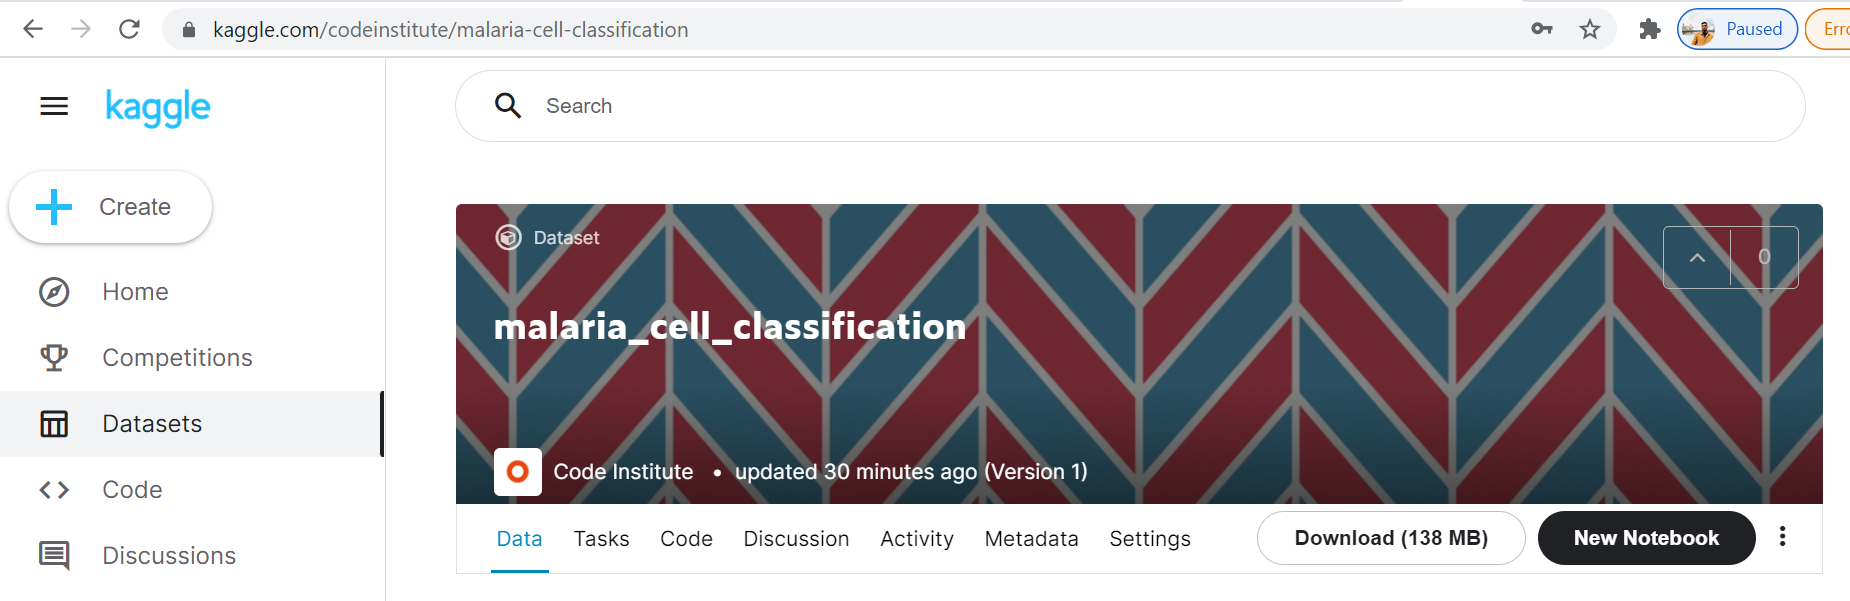

Set the Kaggle Dataset and Download it.

In [ ]:
KaggleDatasetPath = ""
DestinationFolder = "inputs/malaria_dataset"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Unzip the downloaded file, and delete the zip file.

In [ ]:
import zipfile
with zipfile.ZipFile(DestinationFolder + '/malaria-cell-classification.zip', 'r') as zip_ref:
    zip_ref.extractall(DestinationFolder)

os.remove(DestinationFolder + '/malaria-cell-classification.zip')

---

# Data Preparation

---

## Data cleaning

### Check and remove non-image files

In [ ]:
def remove_non_image_file(my_data_dir):
    image_extension = ('.png', '.jpg', '.jpeg')
    folders = os.listdir(my_data_dir)
    for folder in folders:
        files = os.listdir(my_data_dir + '/' + folder)
        # print(files)
        i = []
        j = []
        for given_file in files:
            if not given_file.lower().endswith(image_extension):
                file_location = my_data_dir + '/' + folder + '/' + given_file
                os.remove(file_location)  # remove non image file
                i.append(1)
            else:
                j.append(1)
                pass
        print(f"Folder: {folder} - has image file", len(j))
        print(f"Folder: {folder} - has non-image file", len(i))


In [ ]:
remove_non_image_file(my_data_dir='inputs/malaria_dataset/cell_images')

## Split train validation test set

In [ ]:
import os
import shutil
import random
import joblib


def split_train_validation_test_images(my_data_dir, train_set_ratio, validation_set_ratio, test_set_ratio):

    if train_set_ratio + validation_set_ratio + test_set_ratio != 1.0:
        print("train_set_ratio + validation_set_ratio + test_set_ratio should sum to 1.0")
        return

    # gets classes labels
    labels = os.listdir(my_data_dir)  # it should get only the folder name
    if 'test' in labels:
        pass
    else:
        # create train, test folders with classes labels sub-folder
        for folder in ['train', 'validation', 'test']:
            for label in labels:
                os.makedirs(name=my_data_dir + '/' + folder + '/' + label)

        for label in labels:

            files = os.listdir(my_data_dir + '/' + label)
            random.shuffle(files)

            train_set_files_qty = int(len(files) * train_set_ratio)
            validation_set_files_qty = int(len(files) * validation_set_ratio)

            count = 1
            for file_name in files:
                if count <= train_set_files_qty:
                    # move a given file to the train set
                    shutil.move(my_data_dir + '/' + label + '/' + file_name,
                                my_data_dir + '/train/' + label + '/' + file_name)

                elif count <= (train_set_files_qty + validation_set_files_qty):
                    # move a given file to the validation set
                    shutil.move(my_data_dir + '/' + label + '/' + file_name,
                                my_data_dir + '/validation/' + label + '/' + file_name)

                else:
                    # move given file to test set
                    shutil.move(my_data_dir + '/' + label + '/' + file_name,
                                my_data_dir + '/test/' + label + '/' + file_name)

                count += 1

            os.rmdir(my_data_dir + '/' + label)


Conventionally,
* The training set is divided into a 0.70 ratio of data.
* The validation set is divided into a 0.10 ratio of data.
* The test set is divided into a 0.20 ratio of data.

In [ ]:
split_train_validation_test_images(my_data_dir=f"inputs/malaria_dataset/cell_images",
                                   train_set_ratio=0.7,
                                   validation_set_ratio=0.1,
                                   test_set_ratio=0.2
                                   )


---

# Congratulations

---